In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

from ase.build import graphene
from ase.io import write
import matplotlib.pyplot as plt
import abtem

(examples:stem_quickstart)=
# STEM quickstart

In [2]:
abtem.config.set({"device": "gpu"})
abtem.config.set({"fft": "mkl"})

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='x [Å]', ylabel='y [Å]'>)

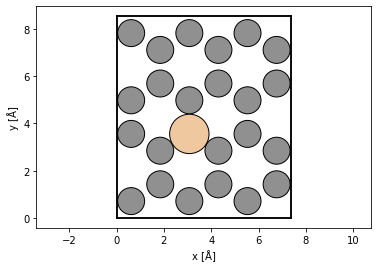

In [3]:
atoms = abtem.orthogonalize_cell(graphene(vacuum=2))

atoms *= (3,2,1)

atoms.numbers[10] = 14

atoms.center()

abtem.show_atoms(atoms)

In [4]:
potential = abtem.Potential(atoms, sampling=0.05)

probe = abtem.Probe(energy=80e3, semiangle_cutoff=30)
probe.grid.match(potential)

[########################################] | 100% Completed | 335.03 ms


C:\Users\jacob\anaconda3\envs\abtem-dask-gpu\lib\site-packages\cupy\fft\_fft.py:454: UserWarning: cuFFT plan cache is disabled on CUDA 11.1 due to a known bug, so performance may be degraded. The bug is fixed on CUDA 11.2+.
  cache = get_plan_cache()


(<Figure size 432x288 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

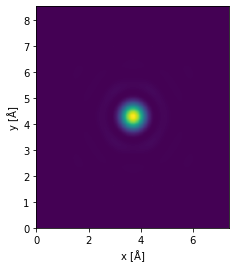

In [5]:
probe.build().show()

In [6]:
print(probe.build().diffraction_patterns().sum().compute())

1.0000001


In [7]:
grid_scan = abtem.GridScan.from_fractional_coordinates(
    potential, start=[0, 0], end=[1, 1], sampling=probe.aperture.nyquist_sampling
)

In [8]:
detector = abtem.FlexibleAnnularDetector()

measurements = probe.scan(potential, scan=grid_scan, detectors=detector)
measurements.array

dask.array<mean_agg-aggregate, shape=(22, 25, 274, 1), dtype=float32, chunksize=(22, 25, 274, 1), chunktype=numpy.ndarray>

In [9]:
measurements.compute()

[########################################] | 100% Completed | 336.42 ms


In [10]:
integrated_measurement = measurements.integrate_radial(50, 150)

interpolated_measurement = integrated_measurement.interpolate(.05)

filtered_measurement = interpolated_measurement.gaussian_filter(.3)

noisy_measurement = filtered_measurement.poisson_noise(1e6)

(<Figure size 432x288 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

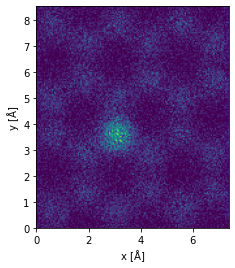

In [11]:
noisy_measurement.show()

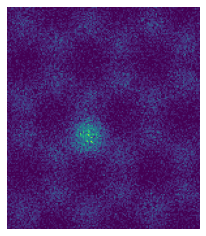

In [12]:
fig, ax = noisy_measurement.show()
ax.axis("off")
plt.savefig("../thumbnails/stem_quickstart.png", bbox_inches="tight", pad_inches=0)